In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:

# Carregar o arquivo JSON usando o pandas
df = pd.read_json('supermarket.json')

# Exibir as primeiras linhas do DataFrame para verificar se os dados foram carregados corretamente
print(df.head())

                                               lojas
0  {'id': 1, 'dados_mensais': [{'mes': 1, 'fatura...
1  {'id': 2, 'dados_mensais': [{'mes': 1, 'fatura...
2  {'id': 3, 'dados_mensais': [{'mes': 1, 'fatura...
3  {'id': 4, 'dados_mensais': [{'mes': 1, 'fatura...
4  {'id': 5, 'dados_mensais': [{'mes': 1, 'fatura...


In [8]:
# Função para extrair os dados de um determinado mês para uma loja específica
def extrair_dados_loja(loja_id, mes):
    for loja in df['lojas']:
        if loja['id'] == loja_id:
            for dados_mensais in loja['dados_mensais']:
                if dados_mensais['mes'] == mes:
                    return dados_mensais
    return None

In [19]:
# Função para plotar gráfico de linha com os dados de faturamento ao longo do ano para uma loja
def plotar_grafico_faturamento(loja_id):
    faturamento_mensal = []
    meses = range(1, 13)
    for mes in meses:
        dados_mes = extrair_dados_loja(loja_id, mes)
        faturamento_mensal.append(dados_mes['faturamento'])

    plt.plot(meses, faturamento_mensal, marker='o')
    plt.title(f'Faturamento Mensal - Loja {loja_id}')
    plt.xlabel('Mês')
    plt.ylabel('Faturamento')
    plt.xticks(meses)
    plt.grid(True)
    plt.show()

In [15]:
# Função para plotar gráfico de barras com os gastos totais ao longo do ano para uma loja
def plotar_grafico_gastos_totais(loja_id):
    gastos_totais = {'Funcionários': 0, 'Fornecedores': 0, 'Diversos': 0}
    meses = range(1, 13)
    for mes in meses:
        dados_mes = extrair_dados_loja(loja_id, mes)
        gastos_totais['Funcionários'] += dados_mes['gastos_funcionarios']
        gastos_totais['Fornecedores'] += dados_mes['despesas_fornecedores']
        gastos_totais['Diversos'] += dados_mes['gastos_diversos']

    plt.bar(gastos_totais.keys(), gastos_totais.values())
    plt.title(f'Gastos Totais - Loja {loja_id}')
    plt.xlabel('Categoria de Gastos')
    plt.ylabel('Valor')
    plt.show()

In [10]:
extrair_dados_loja(1,2)

{'mes': 2,
 'faturamento': {'higiene_e_saude': 14900,
  'limpeza': 19500,
  'bebidas': 8700,
  'carne_e_laticinios': 4800,
  'alimentacao': 5400},
 'gastos_funcionarios': 21000,
 'despesas_fornecedores': 16000,
 'gastos_diversos': 5100}

In [22]:
plotar_grafico_faturamento(1,1)

TypeError: extrair_dados_loja() takes 2 positional arguments but 3 were given

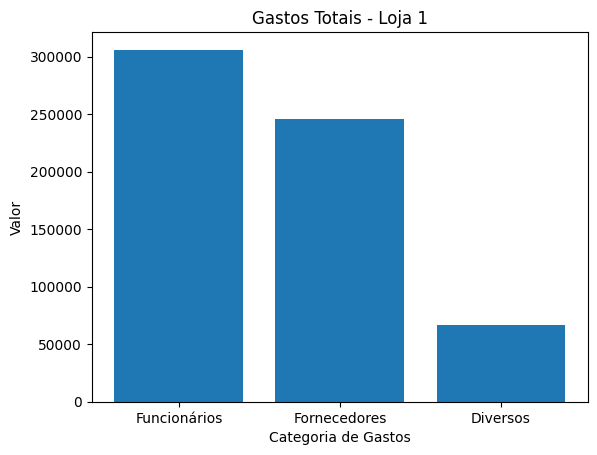

In [18]:
plotar_grafico_gastos_totais(1)